<a href="https://colab.research.google.com/github/mhcrnl/StockTechnicalAnalysis/blob/master/34_BollingerBands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Technical Analysis: Python Tutorial

Bollinger Bands

Contact: andrewshamlet@gmail.com // @andrewshamlet

Python streamlines tasks requiring multiple steps in a single block of code. For this reason, it is a great tool for querying and performing analysis on data.

Last Tutorial, we outlined steps for calculating MACD Signal Line & Centerline Crossovers.

In this post, we introduce a new technical indicator,  Bollinger Bands.

Developed by John Bollinger, Bollinger Bands® are volatility bands placed above and below a moving average. Volatility is based on the standard deviation, which changes as volatility increases and decreases. The bands automatically widen when volatility increases and narrow when volatility decreases. This dynamic nature of Bollinger Bands also means they can be used on different securities with the standard settings. For signals, Bollinger Bands can be used to identify Tops and Bottoms or to determine the strength of the trend.

Bollinger Bands reflect direction with the 20-period SMA and volatility with the upper/lower bands. As such, they can be used to determine if prices are relatively high or low. According to Bollinger, the bands should contain 88-89% of price action, which makes a move outside the bands significant. Technically, prices are relatively high when above the upper band and relatively low when below the lower band. However, relatively high should not be regarded as bearish or as a sell signal. Likewise, relatively low should not be considered bullish or as a buy signal. Prices are high or low for a reason. As with other indicators, Bollinger Bands are not meant to be used as a stand alone tool. Chartists should combine Bollinger Bands with basic trend analysis and other indicators for confirmation.

Bollinger Bands are calculated as follows:
    
        Middle Band = 20 day moving average

        Upper Band = 20 day moving average + (20 Day standard deviation of price x 2) 

        Lower Band = 20 day moving average - (20 Day standard deviation of price x 2)

Bollinger Bands consist of a middle band with two outer bands. The middle band is a simple moving average that is usually set at 20 periods. A simple moving average is used because the standard deviation formula also uses a simple moving average. The look-back period for the standard deviation is the same as for the simple moving average. The outer bands are usually set 2 standard deviations above and below the middle band.

Let’s use Python to compute Bollinger Bands.

1.) Start with the 30 Day Moving Average Tutorial code.

In [15]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

stocks = ['FB']
end = datetime.date.today()

def get_stock(stock,start,end):
     return web.DataReader(stock,'yahoo',start,end)['Close']
df = pd.DataFrame({n: get_stock(n, '1/1/2016', end) for n in stocks})
df.tail()

,FB
Date,
2020-04-24,190.070007
2020-04-27,187.500000
2020-04-28,182.910004
2020-04-29,194.190002
2020-04-30,204.710007


2.) Compute the 20 Day Moving Average.

In [0]:
df['20 ma'] = df['FB'].rolling(window=20).mean()

3.) Compute 20 Day Standard Deviation.

In [0]:
df['20 sd'] = df['FB'].rolling(window=20).std()

4.) Create Upper Band.

In [0]:
df['Upper Band'] = df['20 ma'] + (df['20 sd']*2)

5.) Create Lower Band.

In [0]:
df['Lower Band'] = df['20 ma'] - (df['20 sd']*2)

6.) Plot Bollinger Bands.

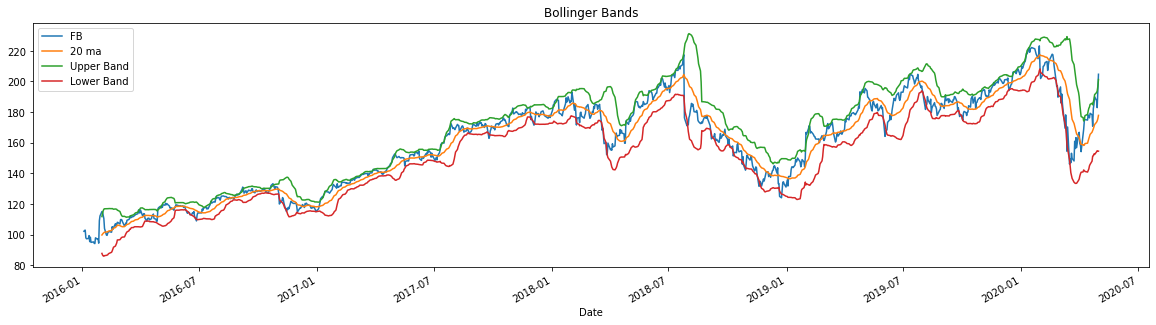

In [20]:
df.plot(y=['FB','20 ma', 'Upper Band', 'Lower Band'], title='Bollinger Bands', figsize=(20, 5))

There you have it! We created our Bollinger Bands. Here’s the full code:

In [0]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

stocks = ['FB']
def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']
df = pd.DataFrame({n: get_stock(n, '1/1/2016', '12/31/2016') for n in stocks})
df['20 ma'] = pd.stats.moments.rolling_mean(df["FB"], 20)
df['20 sd'] = pd.stats.moments.rolling_std(df['FB'],20)
df['Upper Band'] = df['20 ma'] + (df['20 sd']*2)
df['Lower Band'] = df['20 ma'] - (df['20 sd']*2)
df.tail()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()


,FB,20 ma,20 sd,Upper Band,Lower Band
Date,,,,,
2016-12-23,117.27,118.6125,1.645046,121.902593,115.322407
2016-12-27,118.01,118.4925,1.593760,121.680021,115.304979
2016-12-28,116.92,118.2950,1.526977,121.348953,115.241047
2016-12-29,116.35,118.1915,1.587031,121.365561,115.017439
2016-12-30,115.05,118.1890,1.592188,121.373376,115.004624
